JORDAN DILAPO - Food Category Predictor

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import seaborn as sns
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

%matplotlib inline

In [2]:
# URL(xlsx) to Excel file
#NOTE IF FILE DOESN'T DOWNLOAD, PLEASE COPY AND PASTE URL AND CLICK ALLOW, THEN RERUN PROGRAM
url = 'https://www.myfooddata.com/spreadsheets/MyFoodData-Nutrition-Facts-SpreadSheet-Release-1-4.xlsx'

# LOAD COLUMNS NEEDED
foodNull = pd.read_excel(url, header=3, usecols = "B,C,D:F,H:K,W,AB,AN")
foodNull['Food Group'] = foodNull['Food Group'].replace(to_replace ='Dairy and Egg Products ', value = 'Dairy and Egg Products')
food = foodNull.fillna(0)
food = food[food['Food Group'] != 0]

#COMMENT OUT FOOD CATEGORIES THAT YOU WOULD LIKE TO TRAIN THE MODEL TO PREDICT
food = food[food['Food Group'] != 'Baked Foods']
food = food[food['Food Group'] != 'Snacks']
#food = food[food['Food Group'] != 'Sweets']
#food = food[food['Food Group'] != 'Vegetables']
food = food[food['Food Group'] !='American Indian']
food = food[food['Food Group'] != 'Restaurant Foods']
food = food[food['Food Group'] != 'Beverages']
food = food[food['Food Group'] != 'Fats and Oils']
#food = food[food['Food Group'] != 'Meats']
food = food[food['Food Group'] != 'Dairy and Egg Products']
food = food[food['Food Group'] != 'Baby Foods']
food = food[food['Food Group'] != 'Breakfast Cereals']
food = food[food['Food Group'] != 'Soups and Sauces']
food = food[food['Food Group'] != 'Beans and Lentils']
food = food[food['Food Group'] != 'Fish']
food = food[food['Food Group'] != 'Fruits']
food = food[food['Food Group'] != 'Grains and Pasta']
food = food[food['Food Group'] != 'Nuts and Seeds']
food = food[food['Food Group'] != 'Prepared Meals']
food = food[food['Food Group'] != 'Fast Foods']
food = food[food['Food Group'] != 'Spices and Herbs']

#food.head(10)

In [3]:
#TARGETS LIST AS STRINGS

target = food.iloc[:, 1]
#print(target)
targetList = []
for k in target:
    if k not in targetList:
        targetList.append(k)
print(targetList)

['Sweets', 'Vegetables', 'Meats']


In [4]:
# NUMBERS -> TARGETS

targetDict = {}
i = 0
for k in targetList:
    targetDict[i] = k
    i += 1
print(targetDict)

{0: 'Sweets', 1: 'Vegetables', 2: 'Meats'}


In [5]:
#TARGETS ARE NOW NUMBERS

i = 0
for k in targetList:
    food['Food Group'] = food['Food Group'].replace(to_replace =k, value = i)
    i += 1
    
#food.head(10)

In [6]:
#TARGET LIST AS NUMBERS

target = food.iloc[:, 1]
#print(target)
targetList = []
for k in target:
    if k not in targetList:
        targetList.append(k)
print(targetList)

[0, 1, 2]


In [7]:
#FEATURES TO TRAIN MODEL ON

features = food.iloc[:, 2:11]
#print(features)


In [8]:
# NUMBERS -> FEATURES

featureDict = {}
i = 0
for k in features:
    featureDict[i] = k
    i += 1
print(featureDict)

    

{0: 'Calories', 1: 'Fat (g)', 2: 'Protein (g)', 3: 'Sugars (g)', 4: 'Fiber (g)', 5: 'Cholesterol (mg)', 6: 'Saturated Fats (g)', 7: 'Net-Carbs (g)', 8: 'Trans Fatty Acids (g)'}


In [9]:
# FEATURES -> NUMBERS

featureDictRev = {}
i = 0
for k in features:
    featureDictRev[k] = i
    i += 1
print(featureDictRev)



{'Calories': 0, 'Fat (g)': 1, 'Protein (g)': 2, 'Sugars (g)': 3, 'Fiber (g)': 4, 'Cholesterol (mg)': 5, 'Saturated Fats (g)': 6, 'Net-Carbs (g)': 7, 'Trans Fatty Acids (g)': 8}


In [10]:
# NUMBER OF DATA POINTS TO TRAIN MODEL , NUM - 2 = NUMBER OF FEATURES (9)

food.shape

(5977, 12)

In [11]:
#INFO

food.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5977 entries, 28 to 13928
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   5977 non-null   object 
 1   Food Group             5977 non-null   int64  
 2   Calories               5977 non-null   float64
 3   Fat (g)                5977 non-null   float64
 4   Protein (g)            5977 non-null   float64
 5   Sugars (g)             5977 non-null   float64
 6   Fiber (g)              5977 non-null   float64
 7   Cholesterol (mg)       5977 non-null   float64
 8   Saturated Fats (g)     5977 non-null   float64
 9   Net-Carbs (g)          5977 non-null   float64
 10  Trans Fatty Acids (g)  5977 non-null   float64
 11  Sodium (mg)            5977 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 607.0+ KB


In [12]:
#MORE INFO

food.describe()

,Food Group,Calories,Fat (g),Protein (g),Sugars (g),Fiber (g),Cholesterol (mg),Saturated Fats (g),Net-Carbs (g),Trans Fatty Acids (g),Sodium (mg)
count,5977.000000,5977.000000,5977.000000,5977.000000,5977.000000,5977.000000,5977.000000,5977.000000,5977.000000,5977.000000,5977.000000
mean,1.449891,161.613686,8.157127,12.719190,4.206490,1.237862,53.531203,2.982165,8.357211,0.082058,249.973231
std,0.644880,118.057637,9.765730,10.872777,12.538212,2.419942,134.003889,4.149366,16.452302,0.290429,444.667071
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,67.000000,2.180000,2.260000,0.000000,0.000000,0.000000,0.466000,0.000000,0.000000,62.000000
50%,2.000000,141.000000,4.910000,8.900000,0.400000,0.300000,32.000000,1.561000,2.350000,0.000000,182.000000
75%,2.000000,217.000000,11.020000,22.600000,2.430000,2.000000,80.000000,3.677000,8.620000,0.000000,309.000000
max,2.000000,898.000000,99.500000,85.600000,99.800000,77.300000,3100.000000,52.300000,100.000000,4.438000,26050.000000


In [13]:
#TRAINING SET USED TO TRAIN THE ALGORITHMS
#TESTING SET USED TO PREDICT THE DATA AND GET AN ACCURACY PERCENTAGE

X = features
Y = target

#CHOOSE SPLIT RATIO WITH THE test_size PARAMETER
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(4781, 9) (1196, 9) (4781,) (1196,)


In [14]:
#TARGET

Y

28       0
29       0
34       0
50       0
51       0
        ..
13924    0
13925    0
13926    0
13927    0
13928    0
Name: Food Group, Length: 5977, dtype: int64

In [15]:
#FEATURES

X
#X.iloc[:, 0:11]

,Calories,Fat (g),Protein (g),Sugars (g),Fiber (g),Cholesterol (mg),Saturated Fats (g),Net-Carbs (g),Trans Fatty Acids (g)
28,359.0,2.68,1.00,57.58,0.0,0.0,0.650,82.82,0.000
29,371.0,3.00,0.10,49.16,0.0,0.0,0.672,85.80,0.000
34,473.0,20.18,8.72,62.68,1.9,0.0,5.735,65.51,0.029
50,479.0,26.93,4.13,48.34,5.0,4.0,17.590,54.51,0.000
51,338.0,1.70,2.97,0.00,0.1,0.0,0.250,79.28,0.540
...,...,...,...,...,...,...,...,...,...
13924,400.0,8.03,0.81,55.59,0.0,0.0,7.208,82.15,0.000
13925,388.0,8.22,4.67,66.50,0.0,7.0,2.514,78.17,0.000
13926,446.0,18.22,7.62,56.20,1.8,11.0,7.258,65.03,0.000
13927,511.0,31.93,6.77,43.09,2.8,41.0,20.019,46.81,0.000


In [16]:
print(targetDict)

{0: 'Sweets', 1: 'Vegetables', 2: 'Meats'}


In [17]:
print(featureDictRev)

{'Calories': 0, 'Fat (g)': 1, 'Protein (g)': 2, 'Sugars (g)': 3, 'Fiber (g)': 4, 'Cholesterol (mg)': 5, 'Saturated Fats (g)': 6, 'Net-Carbs (g)': 7, 'Trans Fatty Acids (g)': 8}


(5977, 9)


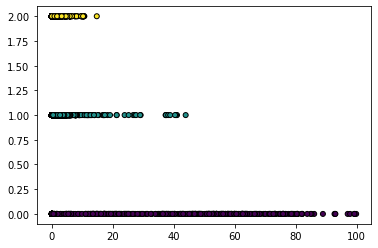

In [18]:
#SCATTER PLOT OF SINGLE FEATURE - CAN CHANGE THE FEATURE YOU WANT TO PLOT

print(X.shape)
plt.scatter(X.iloc[:, featureDictRev['Sugars (g)']], Y, marker='o', c=Y,
            s=25, edgecolor='k')

In [19]:
print(featureDictRev)

{'Calories': 0, 'Fat (g)': 1, 'Protein (g)': 2, 'Sugars (g)': 3, 'Fiber (g)': 4, 'Cholesterol (mg)': 5, 'Saturated Fats (g)': 6, 'Net-Carbs (g)': 7, 'Trans Fatty Acids (g)': 8}


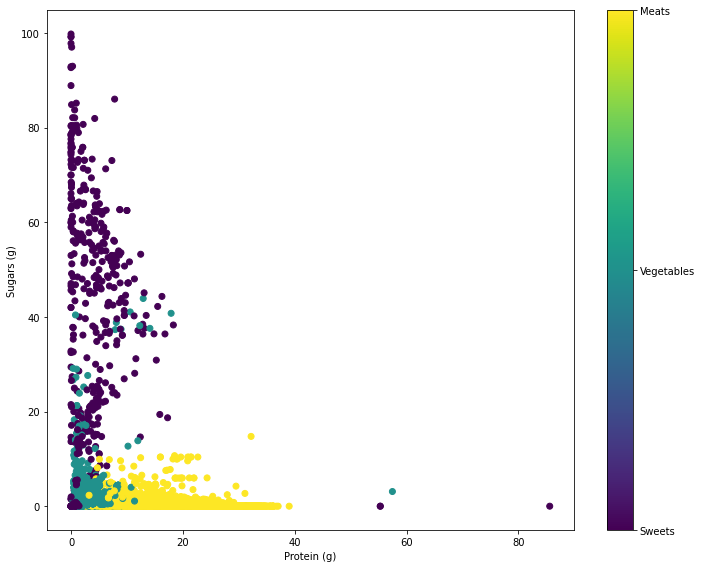

In [20]:
#PLOT COMPARING TWO FEATURES - CAN CHANGE THE FEATURES YOU WANT TO PLOT
x_index = featureDictRev['Protein (g)']
y_index = featureDictRev['Sugars (g)']
                 
formatter = plt.FuncFormatter(lambda i, *args: targetDict[int(i)])

plt.figure(figsize=(10, 8))
plt.scatter(X.iloc[:, x_index], X.iloc[:, y_index], c=Y)
plt.colorbar(ticks=targetList, format=formatter)
plt.xlabel(featureDict[x_index])
plt.ylabel(featureDict[y_index])

plt.tight_layout()
plt.show()

In [21]:
# LOGISTIC REGRESSION TRAINING
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, Y_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
#EXAMPLE OF IT PREDICTING 100 FOOD ITEMS
logisticRegr.predict(X_test[0:100])


array([1, 2, 1, 2, 2, 0, 2, 2, 2, 0, 1, 1, 0, 1, 0, 0, 1, 2, 2, 2, 1, 2,
       2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 0,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       2, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 0, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       1, 2, 2, 0, 2, 2, 1, 1, 2, 2, 2, 0])

In [23]:
# PERCENTAGE THAT THE MODEL IS CORRECT
score = logisticRegr.score(X_test, Y_test)
print(score)
targetStr = str(targetDict.values())
print("Accuracy of the model guessing if a food is a " + targetStr[13:-2] + " is " + str(score * 100)+"%")

0.9615384615384616
Accuracy of the model guessing if a food is a 'Sweets', 'Vegetables', 'Meats' is 96.15384615384616%


In [24]:
#SET UP PREDICTIONS

predictions = logisticRegr.predict(X_test)


In [25]:
#CREATE CONFUSION CHART MATRIX

cm = metrics.confusion_matrix(Y_test, predictions)
print(cm)

[[ 82  16   0]
 [  7 437  11]
 [  0  12 631]]


In [26]:
print(targetDict)

{0: 'Sweets', 1: 'Vegetables', 2: 'Meats'}


Text(0.5, 1.0, 'Accuracy Score: 0.9615384615384616')

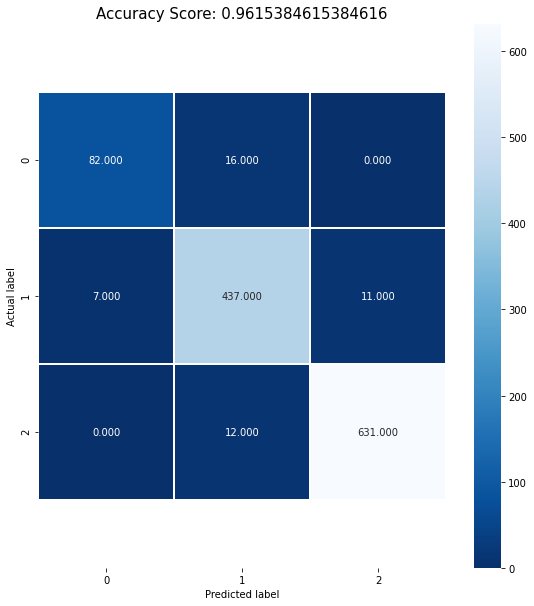

In [27]:
#FINAL CONFUSION MATRIX

plt.figure(figsize=(10,10))
ax = sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

In [28]:
#REFERENCES https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a